In [201]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [115]:
path1=r"D:\my_git\Handwriting _Recognition\Data\mnist_test.csv"
path2=r"D:\my_git\Handwriting _Recognition\Data\mnist_train.csv"

test_data=pd.read_csv(path1)
train_data=pd.read_csv(path2)


In [116]:
df=pd.concat([test_data,train_data],axis=0)

In [117]:
y=df['label']

In [118]:
df.reset_index(drop=True,inplace=True)

In [119]:
y=df['label']

In [120]:
x=df.drop(columns='label')

In [121]:
def missingvalues(ms):
    if ms.any():
        print("Missingvalue found")
        print(ms)
    else:
        print("Missing values not found")

In [122]:
missingvalues(x.isnull().sum())

Missing values not found


In [123]:
missingvalues(y.isnull().sum())

Missing values not found


In [180]:
# converting the X to numpy array so the we can display the image 
X=x.to_numpy()
type(X)
y=y.to_numpy()

In [181]:
# Y have a 0 to9 numbers 
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [219]:
def display_img(index):
    fig,ax=plt.subplots(figsize=(2,2))
    ax.imshow(X[index].reshape(28,28),cmap='gray')
    ax.axis('off')
    ax.set_title(y[index])

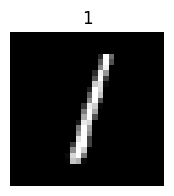

In [220]:
display_img(2)

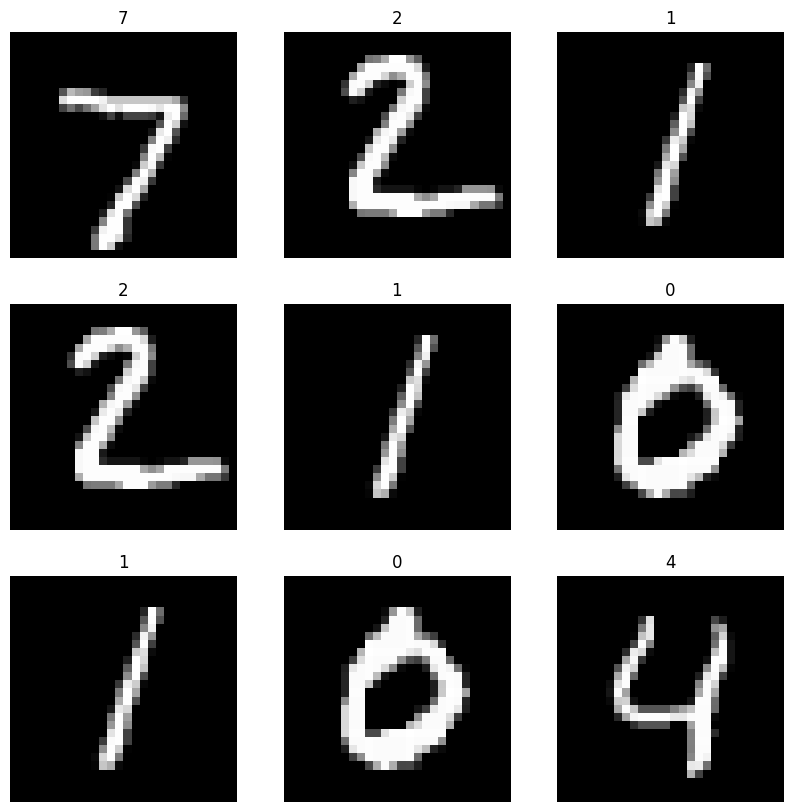

In [184]:
# display some rows and columns in dataset 
fig,ax=plt.subplots(3,3,figsize=(10,10))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X[i+j].reshape(28,28),cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(y[i+j])



In [185]:
# converting the X as integers they are in float as all the values 0 to 255
X=X.astype(int)
y=y.astype(int)

#### Spliting the dataset into train and test data taking 60000 image as testing data and 10000 image as test data randomly


In [191]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7,random_state=42)

In [192]:
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(10000, 784) (60000, 784) (10000,) (60000,)


In [195]:
#RandomForest Alogorithm
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [196]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [199]:
y_pred=rf.predict(X_test)

In [207]:
score_rf=rf.score(X_test,y_test)
print("Test accuracy of the RandomForestClassifier",round(score_rf*100,2))

Test accuracy of the RandomForestClassifier 96.85


In [212]:
print(y_pred[10])

5


In [230]:
def display_af_train(index):
    fig,ax=plt.subplots(figsize=(2,2))
    ax.imshow(X_test[index].reshape(28,28),cmap='gray')
    ax.axis('off')
    ax.set_title(y_pred[index])

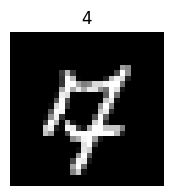

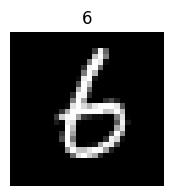

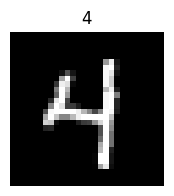

In [231]:
for i in range(3):
    display_af_train(i)